In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from math import sin, cos, sqrt, atan2, radians
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

## **Lectura del dataset y eliminación de columnas**

In [3]:
# Carga el csv en un dataframe
df = pd.read_csv('Eventos 2023 Sevilla.csv', header=0, low_memory=False)
df.loc[:10]

,COD_ADMISION,COD_DDST_DDIR_DIR_CODPOSTAL,FEC_EVENTO,COD_EVENTO,COD_APLICACION,NUM_GEO_LATITUD,NUM_GEO_LONGITUD,...,COD_DEST_CODPROVINCIA,NUM_ORIGEN_COORDENADAX,NUM_ORIGEN_COORDENADAY,COD_ORIGEN_CODPOSTAL,COD_ORIGEN_CODPROVINCIA,COD_EVT_UNIDADCONTENEDORA,TIPO_EVENTO
0,PQ936A0703594420141330Y,41330,2023-04-03T09:44:01+02:00,I-E-001,11,37.592640,-5.726603,...,NaN,NaN,NaN,28070,NaN,4134001.0,Entregado
1,PQ936A0703039950141920J,41920,2023-04-03T09:54:35+02:00,H-E-001,11,37.358570,-6.035367,...,NaN,NaN,NaN,28070,NaN,4118994.0,Intento de entrega
2,PQ5NB01300413720141950L,41950,2023-04-03T10:54:20+02:00,I-E-001,11,37.388004,-6.049375,...,NaN,NaN,NaN,08918,NaN,4128394.0,Entregado
3,PQ936A0704176690141320B,41320,2023-04-03T09:45:23+02:00,G-E-001,11,NaN,NaN,...,NaN,NaN,NaN,28070,NaN,NaN,Entrada en unidad
4,PQ8BRK0722349140141620N,41620,2023-04-03T09:45:21+02:00,H-E-002,11,NaN,NaN,...,NaN,NaN,NaN,28029,NaN,4118794.0,En reparto
5,PQ56GB0763719020141740Y,41740,2023-04-03T10:04:36+02:00,I-E-001,11,36.919811,-6.074094,...,NaN,NaN,NaN,28070,NaN,4122394.0,Entregado
6,PQ7RTR0409985120141007H,41007,2023-04-03T09:50:32+02:00,G-E-001,11,NaN,NaN,...,NaN,NaN,NaN,08070,NaN,NaN,Entrada en unidad
7,PQ3LRG0200444710141500T,41500,2023-04-03T11:05:22+02:00,I-E-001,11,37.330879,-5.854337,...,NaN,NaN,NaN,28010,NaN,4117994.0,Entregado
8,PQ0ANI0000047570141940Q,41940,2023-04-03T08:41:10+02:00,H-E-002,11,NaN,NaN,...,NaN,NaN,NaN,08820,NaN,4119294.0,En reparto
9,PQ936A0703061930141020C,41020,2023-04-03T08:58:30+02:00,G-E-001,11,NaN,NaN,...,NaN,NaN,NaN,28070,NaN,NaN,Entrada en unidad


In [4]:
# Valores totales
df.count()

COD_ADMISION                    3076455
COD_DDST_DDIR_DIR_CODPOSTAL     3076455
FEC_EVENTO                      3076455
COD_EVENTO                      3076455
COD_APLICACION                  3076455
NUM_GEO_LATITUD                  968357
NUM_GEO_LONGITUD                 968357
NUM_ENV_ALTURA                  3076357
NUM_ENV_ANCHURA                 3076357
NUM_ENV_LONGITUD                3076357
COD_ENV_UNIDADMEDIDALONGITUD    3076357
COD_ENV_UNIDADMEDIDAALTURA      3076357
COD_ENV_UNIDADMEDIDAANCHURA     3076357
NUM_PESO                        3076455
COD_ENV_UNIDADMEDIDAPESO              0
NUM_DEST_COORDENADAX            2084673
NUM_DEST_COORDENADAY            2084673
COD_DEST_CODPOSTAL              3076455
COD_DEST_CODPROVINCIA                 0
NUM_ORIGEN_COORDENADAX                0
NUM_ORIGEN_COORDENADAY                0
COD_ORIGEN_CODPOSTAL            3076415
COD_ORIGEN_CODPROVINCIA               0
COD_EVT_UNIDADCONTENEDORA       1851356
TIPO_EVENTO                     3076455


In [5]:
# Valores no nulos
df.notnull().sum()

COD_ADMISION                    3076455
COD_DDST_DDIR_DIR_CODPOSTAL     3076455
FEC_EVENTO                      3076455
COD_EVENTO                      3076455
COD_APLICACION                  3076455
NUM_GEO_LATITUD                  968357
NUM_GEO_LONGITUD                 968357
NUM_ENV_ALTURA                  3076357
NUM_ENV_ANCHURA                 3076357
NUM_ENV_LONGITUD                3076357
COD_ENV_UNIDADMEDIDALONGITUD    3076357
COD_ENV_UNIDADMEDIDAALTURA      3076357
COD_ENV_UNIDADMEDIDAANCHURA     3076357
NUM_PESO                        3076455
COD_ENV_UNIDADMEDIDAPESO              0
NUM_DEST_COORDENADAX            2084673
NUM_DEST_COORDENADAY            2084673
COD_DEST_CODPOSTAL              3076455
COD_DEST_CODPROVINCIA                 0
NUM_ORIGEN_COORDENADAX                0
NUM_ORIGEN_COORDENADAY                0
COD_ORIGEN_CODPOSTAL            3076415
COD_ORIGEN_CODPROVINCIA               0
COD_EVT_UNIDADCONTENEDORA       1851356
TIPO_EVENTO                     3076455


In [6]:
# Elimina las columnas vacías
list = []
for column in df.columns:
    if df[column].count() == 0:
        list.append(column)
df = df.drop(columns=list)
print(str(len(list)) + " columnas eliminadas:")
for c in list:
    print(" - " + c)

5 columnas eliminadas:
 - COD_ENV_UNIDADMEDIDAPESO
 - COD_DEST_CODPROVINCIA
 - NUM_ORIGEN_COORDENADAX
 - NUM_ORIGEN_COORDENADAY
 - COD_ORIGEN_CODPROVINCIA


In [7]:
# Valores distintos por cada columna. Elimina las columnas que sólo tienen un valor
list = []
for column in df.columns:
    n = df[column].nunique()
    print(column + ": " + str(n))
    if n == 1:
        list.append(column)
df = df.drop(columns=list)
print("\n" + str(len(list)) + " columnas eliminadas:")
for c in list:
    print(" - " + c)

COD_ADMISION: 825370
COD_DDST_DDIR_DIR_CODPOSTAL: 287
FEC_EVENTO: 1889747
COD_EVENTO: 4
COD_APLICACION: 1
NUM_GEO_LATITUD: 142765
NUM_GEO_LONGITUD: 492270
NUM_ENV_ALTURA: 205
NUM_ENV_ANCHURA: 163
NUM_ENV_LONGITUD: 208
COD_ENV_UNIDADMEDIDALONGITUD: 1
COD_ENV_UNIDADMEDIDAALTURA: 1
COD_ENV_UNIDADMEDIDAANCHURA: 1
NUM_PESO: 6892
NUM_DEST_COORDENADAX: 128831
NUM_DEST_COORDENADAY: 128782
COD_DEST_CODPOSTAL: 398
COD_ORIGEN_CODPOSTAL: 5870
COD_EVT_UNIDADCONTENEDORA: 260
TIPO_EVENTO: 4

4 columnas eliminadas:
 - COD_APLICACION
 - COD_ENV_UNIDADMEDIDALONGITUD
 - COD_ENV_UNIDADMEDIDAALTURA
 - COD_ENV_UNIDADMEDIDAANCHURA


In [8]:
# Elimina las columnas que no aportan nada: COD_ORIGEN_CODPOSTAL, COD_DDST_DDIR_DIR_CODPOSTAL y TIPO_EVENTO
list = ['COD_ORIGEN_CODPOSTAL', 'COD_DDST_DDIR_DIR_CODPOSTAL', 'TIPO_EVENTO']
df = df.drop(columns=list)
print(str(len(list)) + " columnas eliminadas:")
for c in list:
    print(" - " + c)

3 columnas eliminadas:
 - COD_ORIGEN_CODPOSTAL
 - COD_DDST_DDIR_DIR_CODPOSTAL
 - TIPO_EVENTO


In [9]:
# Guarda las columnas
column_name = df.columns.tolist()
print(column_name)
print(str(len(column_name)) + " columnas")

['COD_ADMISION', 'FEC_EVENTO', 'COD_EVENTO', 'NUM_GEO_LATITUD', 'NUM_GEO_LONGITUD', 'NUM_ENV_ALTURA', 'NUM_ENV_ANCHURA', 'NUM_ENV_LONGITUD', 'NUM_PESO', 'NUM_DEST_COORDENADAX', 'NUM_DEST_COORDENADAY', 'COD_DEST_CODPOSTAL', 'COD_EVT_UNIDADCONTENEDORA']
13 columnas


In [10]:
# Valores distintos por cada columna
print("REGISTROS TOTALES: " + str(df.COD_ADMISION.count()) + "\n")
for column in df.columns:
    n = df[column].nunique()
    print(column + ": " + str(n))

REGISTROS TOTALES: 3076455

COD_ADMISION: 825370
FEC_EVENTO: 1889747
COD_EVENTO: 4
NUM_GEO_LATITUD: 142765
NUM_GEO_LONGITUD: 492270
NUM_ENV_ALTURA: 205
NUM_ENV_ANCHURA: 163
NUM_ENV_LONGITUD: 208
NUM_PESO: 6892
NUM_DEST_COORDENADAX: 128831
NUM_DEST_COORDENADAY: 128782
COD_DEST_CODPOSTAL: 398
COD_EVT_UNIDADCONTENEDORA: 260


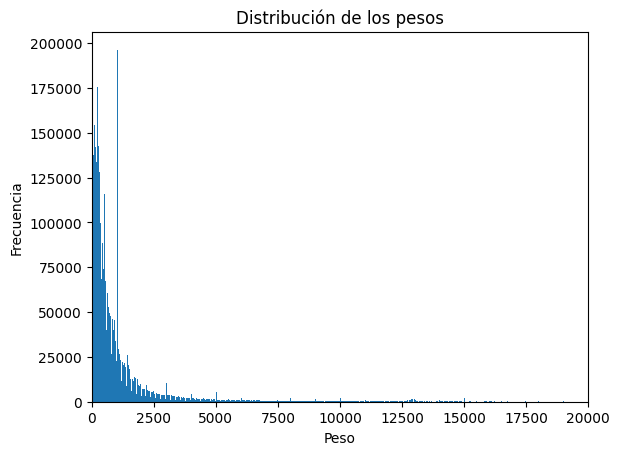

In [11]:
# Distribución de los pesos
plot_pesos = df.NUM_PESO.plot.hist(bins=1000, title="Distribución de los pesos", xlabel="Peso", ylabel="Frecuencia", xlim=(0,20000))

In [12]:
# Frecuencia de eventos por envío
df2 = df.groupby('COD_ADMISION')['COD_EVENTO'].count()
df2 = pd.DataFrame(df2)
df2.value_counts()

COD_EVENTO
3             515776
4             112831
6              55482
2              40777
8              30448
5              27106
7              23406
1               7868
9               7671
10              2294
11               871
12               451
13               179
14                88
15                66
16                21
17                11
18                10
19                 4
21                 3
20                 2
22                 2
24                 1
29                 1
33                 1
Name: count, dtype: int64

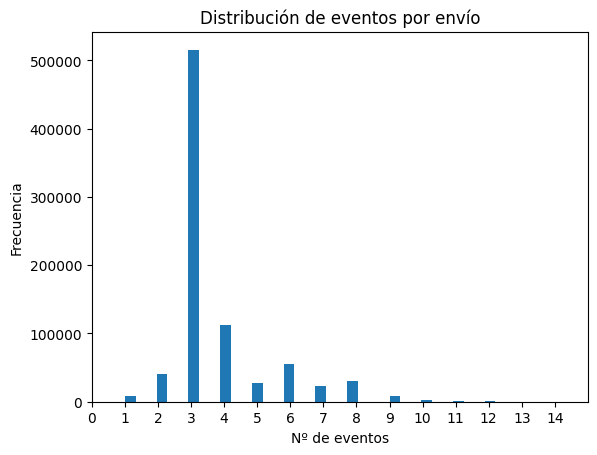

In [13]:
# Distribución de los eventos por envío
plot_eventos = df2.COD_EVENTO.plot.hist(bins=100, title="Distribución de eventos por envío", xlabel="Nº de eventos", ylabel="Frecuencia", xlim=(0,15), xticks=range(0,15))

## **Lectura de coordenadas de unidades de Sevilla**

In [14]:
# Carga el csv en un dataframe
df_uni = pd.read_csv('unidades_sevilla_2.csv', header=0, low_memory=False)
df_uni.loc[:10]

,CODIRED,NUM_LATITUD,NUM_LONGITUD,UNIDAD,UR,UD,USE,OT,OSP,TARDE
0,4101696,37.384963,-5.993888,SEVILLA UR 1,1,0,0,0,0,0
1,4101796,37.378272,-5.934456,SEVILLA USE 1,0,0,1,0,0,1
2,4107796,37.391488,-5.973403,SEVILLA UR 2,1,0,0,0,0,1
3,4107896,37.373900,-5.953191,SEVILLA UR 3,1,0,0,0,0,1
4,4107996,37.396360,-5.965715,SEVILLA UR 4,1,0,0,0,0,0
5,4108096,37.385251,-5.977084,SEVILLA UR 5,1,0,0,0,0,1
6,4108296,37.377778,-5.999529,SEVILLA UR 7,1,0,0,0,0,0
7,4111001,37.342011,-6.137147,BOLLULLOS DE LA MITACION,0,0,0,1,0,0
8,4113001,37.269958,-6.061171,LA PUEBLA DEL RIO,0,0,0,1,0,0
9,4114002,37.131148,-6.164426,ISLA MAYOR,0,0,0,1,0,0


In [15]:
# Elimina filas con valores nulos, ordena por CODIRED y pone esa columna como índice del dataframe
df_uni = df_uni.dropna()
print("Unidades con coordenadas: " + str(df_uni.CODIRED.count()))
df_uni = df_uni.sort_values('CODIRED', ignore_index=True)
df_uni.set_index('CODIRED', inplace=True)

Unidades con coordenadas: 76


In [16]:
# Función para obtener las datos de la unidad
def get_datos_unidad(codired):
    if type(codired) == str:
        codired = int(codired)

    x, y, ur, ud, use, ot, osp = (0.0, 0.0, 0, 0, 0, 0, 0)
    if codired in df_uni.index:
        y = df_uni.loc[codired]['NUM_LATITUD']
        x = df_uni.loc[codired]['NUM_LONGITUD']
        ur = df_uni.loc[codired]['UR']              # Unidad de Reparto
        ud = df_uni.loc[codired]['UD']              # Unidad de Distribución
        use = df_uni.loc[codired]['USE']            # Unidad de Servicios Especiales
        ot = df_uni.loc[codired]['OT']              # Oficina Técnica
        osp = df_uni.loc[codired]['OSP']            # Oficina Subordinada Primaria
    
    return(x, y, ur, ud, use, ot, osp)

In [17]:
# Función para obtener el tipo de unidad
def get_tipo_unidad(envio):
    tipo = ""
    if envio['ur'] == 1:
        tipo = "UR"
    elif envio['ud'] == 1:
        tipo = "UD"
    elif envio['ot'] == 1:
        tipo = "OT"
    elif envio['use'] == 1:
        tipo = "USE"
    elif envio['osp'] == 1:
        tipo = "OSP"
    
    return tipo

## **Pre-procesado del dataset**

In [18]:
# Ordena los eventos por código de paquete y fecha de evento
df = df.sort_values(['COD_ADMISION', 'FEC_EVENTO'], ignore_index=True)
df.loc[:10]

,COD_ADMISION,FEC_EVENTO,COD_EVENTO,NUM_GEO_LATITUD,NUM_GEO_LONGITUD,NUM_ENV_ALTURA,NUM_ENV_ANCHURA,NUM_ENV_LONGITUD,NUM_PESO,NUM_DEST_COORDENADAX,NUM_DEST_COORDENADAY,COD_DEST_CODPOSTAL,COD_EVT_UNIDADCONTENEDORA
0,PQ00010202068570141500J,2023-01-17T12:18:16+01:00,G-E-001,NaN,NaN,14.0,27.0,36.0,1590.0,NaN,NaN,41500,NaN
1,PQ00010202068570141500J,2023-01-17T12:19:59+01:00,H-E-002,NaN,NaN,14.0,27.0,36.0,1590.0,NaN,NaN,41500,4117994.0
2,PQ00010202068570141500J,2023-01-17T20:31:47+01:00,H-E-001,37.338367,-5.841896,14.0,27.0,36.0,1590.0,NaN,NaN,41500,4117994.0
3,PQ00010202068570141500J,2023-01-18T08:44:46+01:00,G-E-001,NaN,NaN,14.0,27.0,36.0,1590.0,NaN,NaN,41500,NaN
4,PQ00010202068570141500J,2023-01-18T09:59:17+01:00,H-E-002,NaN,NaN,14.0,27.0,36.0,1590.0,NaN,NaN,41500,4117994.0
5,PQ00010202068570141500J,2023-01-18T11:21:43+01:00,I-E-001,37.363777,-5.879376,14.0,27.0,36.0,1590.0,NaN,NaN,41500,4117994.0
6,PQ00010202070810141016M,2023-01-20T15:54:16+01:00,G-E-001,NaN,NaN,20.0,40.0,50.0,10195.0,-5.924342,37.382611,41016,NaN
7,PQ00010202070810141016M,2023-01-20T16:07:06+01:00,H-E-002,NaN,NaN,20.0,40.0,50.0,10195.0,-5.924342,37.382611,41016,4101796.0
8,PQ00010202070810141016M,2023-01-20T17:23:04+01:00,I-E-001,37.381817,-5.921431,20.0,40.0,50.0,10195.0,-5.924342,37.382611,41016,4101796.0
9,PQ00010202071390141900B,2023-02-06T07:30:39+01:00,G-E-001,NaN,NaN,9.0,37.0,48.0,1200.0,-6.031085,37.395602,41900,NaN


In [20]:
# Diccionarios para guardar los registros
eventoDict = {
    "fecha": None,      # Fecha del evento
    "codEve": "",       # Código del evento
}

envioDict = {
    "codPaq": "",           # Código del paquete
    "numEventos": 0,        # Nº de eventos
    "eventos": [],          # Lista con los eventos del envío
    "x_ori": 0.0,           # Coordenada X de origen (longidud)
    "y_ori": 0.0,           # Coordenada Y de origen (latitud)
    "alto": 0,              # Medidas del envío en cm
    "ancho": 0,             # Medidas del envío en cm
    "largo": 0,             # Medidas del envío en cm
    "peso": 0,              # Peso del envío en gramos
    "x_dest": 0.0,          # Coordenada X de destino (longitud)
    "y_dest": 0.0,          # Coordenada Y de destino (latitud)
    "cp": 0,                # Código Postal
    "unidad": 0,            # Códido de la unidad de reparto
    "ur": 0,                # 1 si la unidad es de tipo UR
    "ud": 0,                # 1 si la unidad es de tipo UD
    "use": 0,               # 1 si la unidad es de tipo USE
    "ot": 0,                # 1 si la unidad es de tipo OT
    "osp": 0,               # 1 si la unidad es de tipo OSP
    "distancia": 0,         # Distancia entre coordenadas origen y destino
    "ciclo": [],            # Lista con el ciclo completo del envío (alta unidad - en reparto - entregado/intento de entrega)
    "tiempo_entrega":0,     # Tiempo de entrega en minutos
    "velocidad": 0.0,       # Velocidad media en km/h en la entrega del envío
    "isOK": False           # True si el envío tiene todos los datos para estar en el dataset final
}

dfDict = {
    "codPaq": "",               # Código del paquete
    "mes_alta": 0,              # Mes de la fecha de alta
    "diasem_alta": 0,           # Día de la semana de la fecha de alta
    "fecha_alta": None,         # Fecha de alta
    "fecha_reparto": None,      # Fecha de salida en reparto (para ordenar y obtener envíos por cartero)
    "fecha_entrega": None,      # Fecha de entrega o de intento de entrega
    "turno": 0,                 # Turno de reparto (0 - mañana, 1 - tarde)
    "num_envios": 0,            # Número de envíos en cada unidad por cada cartero
    "alto": 0,                  # Medidas del envío en cm
    "ancho": 0,                 # Medidas del envío en cm
    "largo": 0,                 # Medidas del envío en cm
    "peso": 0,                  # Peso del envío en gramos
    "pv": 0.0,                  # Peso Volumétrico
    "cp": 0,                    # Código Postal
    "unidad": 0,                # Códido de la unidad de reparto
    "tipo": "",                 # Tipo de unidad (UR, UD, USE, OT, OSP)
    "ur": 0,                    # 1 si la unidad es de tipo UR
    "ud": 0,                    # 1 si la unidad es de tipo UD
    "use": 0,                   # 1 si la unidad es de tipo USE
    "ot": 0,                    # 1 si la unidad es de tipo OT
    "osp": 0,                   # 1 si la unidad es de tipo OSP
    "distancia": 0,             # Distancia entre coordenadas unidad y destino
    "tiempo_entrega": 0,        # Tiempo de entrega en minutos (variable objetivo)
    "x_dest": 0.0,              # Coordenada X de destino (longitud)
    "y_dest": 0.0,              # Coordenada Y de destino (latitud)
    "min_reparto": 0            # Minutos transcurridos en el día hasta la hora de reparto (h*60 + m)
}

In [21]:
# Función para calcular la distancia entre dos coordenadas geográficas
def get_distance(x1, y1, x2, y2):
    R = 6373.0          # Radio aproximado de la Tierra en km

    lat1 = radians(y1)
    lon1 = radians(x1)
    lat2 = radians(y2)
    lon2 = radians(x2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return round(R * c, 3)

In [22]:
# Función para actualizar datos del envío obtenidos de la fila del evento
def update_envio(envio, row):
    if envio["codPaq"] == "" and not pd.isna(row.COD_ADMISION):
        envio["codPaq"] = row.COD_ADMISION
    
    # Medidas y peso del envío
    if envio["alto"] == 0 and not pd.isna(row.NUM_ENV_ALTURA):
        envio["alto"] = int(row.NUM_ENV_ALTURA)
    
    if envio["ancho"] == 0 and not pd.isna(row.NUM_ENV_ANCHURA):
        envio["ancho"] = int(row.NUM_ENV_ANCHURA)
    
    if envio["largo"] == 0 and not pd.isna(row.NUM_ENV_LONGITUD):
        envio["largo"] = int(row.NUM_ENV_LONGITUD)
    
    if envio["peso"] == 0 and not pd.isna(row.NUM_PESO):
        envio["peso"] = int(row.NUM_PESO)
    
    # Unidad de reparto
    if envio["unidad"] == 0 and not pd.isna(row.COD_EVT_UNIDADCONTENEDORA):
        envio["unidad"] = int(row.COD_EVT_UNIDADCONTENEDORA)
        envio["x_uni"], envio["y_uni"], envio["ur"], envio["ud"], envio["use"], envio["ot"], envio["osp"] = get_datos_unidad(envio["unidad"])
    
    # Coordenadas de destino
    if envio["x_dest"] == 0.0 and not pd.isna(row.NUM_DEST_COORDENADAX):
        envio["x_dest"] = float(row.NUM_DEST_COORDENADAX)
    
    if envio["y_dest"] == 0.0 and not pd.isna(row.NUM_DEST_COORDENADAY):
        envio["y_dest"] = float(row.NUM_DEST_COORDENADAY)

    # Coordenadas de origen (punto de entrega anterior según la ruta del cartero)
    if envio["x_ori"] == 0.0 and not pd.isna(row.NUM_GEO_LONGITUD):
        envio["x_ori"] = float(row.NUM_GEO_LONGITUD)
    
    if envio["y_ori"] == 0.0 and not pd.isna(row.NUM_GEO_LATITUD):
        envio["y_ori"] = float(row.NUM_GEO_LATITUD)

    # Código Postal
    if envio["cp"] == 0 and not pd.isna(row.COD_DEST_CODPOSTAL):
        envio["cp"] = int(row.COD_DEST_CODPOSTAL)
        
    # Añade el evento a la lista de eventos
    evento = dict(eventoDict)
    evento["fecha"] = datetime.strptime(row.FEC_EVENTO, "%Y-%m-%dT%H:%M:%S%z")
    evento["codEve"] = row.COD_EVENTO
    envio["eventos"].append(evento.copy())
    evento.clear()
    envio["numEventos"] += 1
    return envio

In [23]:
"""
Función para encontrar un ciclo válido del envío (alta unidad - en reparto - entregado/intento de entrega)
Códigos: G-E-001 - H-E-002 - I-E-001/H-E-001
Será válido si el ciclo se produce en menos de 8 horas (jornada laboral) y a una velocidad media inferior a 80 km/h
"""

ALTA_UNIDAD = 'G-E-001'
EN_REPARTO = 'H-E-002'
ENTREGADO = 'I-E-001'
INTENTO_ENTREGA = 'H-E-001'

MIN_MIN = 5
MAX_MIN = 420

def get_ciclo(envio):
    ciclo = [dict(eventoDict), dict(eventoDict), dict(eventoDict)]
    num_ciclo = 0
    k = 0
    while num_ciclo < 3 and k < len(envio["eventos"]):
        if envio["eventos"][k]["codEve"] == ALTA_UNIDAD:
            num_ciclo = 1
            ciclo[0] = envio["eventos"][k]
        elif envio["eventos"][k]["codEve"] == EN_REPARTO and num_ciclo == 1:
            num_ciclo = 2
            ciclo[1] = envio["eventos"][k]
        elif envio["eventos"][k]["codEve"] == ENTREGADO or envio["eventos"][k]["codEve"] == INTENTO_ENTREGA and num_ciclo == 2:
            ciclo[2] = envio["eventos"][k]
            if ciclo[2]["fecha"] is not None and ciclo[1]["fecha"] is not None:
                minutes = (ciclo[2]["fecha"] - ciclo[1]["fecha"]).total_seconds() / 60
                # Si el tiempo transcurrido es mayor de 5 min y menor de 7 horas (420 minutos), el ciclo es válido
                if minutes >= MIN_MIN and minutes <= MAX_MIN:
                    num_ciclo = 3
                else:
                    num_ciclo = 0
        k += 1
    if num_ciclo < 3:
        ciclo.clear()
    return ciclo

In [24]:
# Función para comprobar si un envío es válido para el dataset final
def check_envio(envio):
    cod = 0
    
    # Debe tener como mínimo 3 eventos
    if envio["numEventos"] < 3:
        cod = 1

    # Debe tener un ciclo válido
    elif len(envio["ciclo"]) != 3 or envio["ciclo"][0]["fecha"] is None or envio["ciclo"][1]["fecha"] is None or envio["ciclo"][2]["fecha"] is None:
        cod = 2

    # Debe tener unidad de reparto válida (comienza por 41)
    elif envio["unidad"] == 0 or str(envio["unidad"])[:2] != "41" or len(str(int(envio["unidad"]))) != 7:
        cod = 3

    # Debe tener coordenadas de origen y destino
    elif envio["x_dest"] >= 0.0 or envio["y_dest"] <= 0.0 or envio["x_ori"] >= 0.0 or envio["y_ori"] <= 0.0:
        cod = 4

    # Debe tener un código postal válido
    elif envio["cp"] < 41000 or envio["cp"] > 41999:
        cod = 5

    return cod

In [25]:
# Función para cerrar y validar envío (id_fecha: 0 = Alta de unidad, 1 = En reparto)
def cierra_envio(envio, id_fecha):
    MIN_VEL = 0.1
    MAX_VEL = 20.0

    envio["ciclo"] = get_ciclo(envio)
    check = check_envio(envio)
    if check == 0:
        envio["distancia"] = get_distance(envio["x_uni"], envio["y_uni"], envio["x_dest"], envio["y_dest"])
        envio["tiempo_entrega"] = (envio["ciclo"][2]["fecha"] - envio["ciclo"][id_fecha]["fecha"]).total_seconds() / 60
        envio["turno"] = 0 if envio["ciclo"][0]["fecha"].hour < 13 else 1

        # Debe haberse realizado a una velocidad media superior a 0.1 km/h e inferior a 20 km/h
        vel = envio["distancia"] / (envio["tiempo_entrega"]/60) if envio["tiempo_entrega"] > 0 else 0
        if vel >= MIN_VEL and vel <= MAX_VEL:
            envio["isOK"] = True
        else:
            check = 6
        
    return (check, envio)

In [26]:
# Recorre todos los eventos y los agrupa por envíos
list_envios = []                                                    # Lista para guardar un registro por cada envío agrupando la información de todos sus eventos
paq = ""                                                            # Usado para determinar cuándo cambia el envío (eventos ordenados alfabéticamente por envío)
envio = dict(envioDict)                                             # Almacena la información del envío actual
status_envios = [0, 0, 0, 0, 0, 0, 0]                               # Lista para almacenar el número de envíos por cada tipo de código de chequeo 
unidades_sin_coord = []                                             # Lista para guardar las unidades de Sevilla que no tienen coordenadas
unidades_sin_cp = []                                                # Lista para guardar las unidades de Sevilla que no tienen coordenadas
max_eventos = len(df)
id_fecha = 1    #0 -> Alta de unidad, 1 -> En reparto
#max_eventos = 10000

# Listas para escribir porcentaje de progreso
progress_porc = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]
progress_value = [int(i * (max_eventos-1)) for i in progress_porc]

# Recorre los eventos
for k in range(max_eventos):
    if k in progress_value:
        print(str(round(progress_porc[progress_value.index(k)] * 100)) + "%")

    # Si el código del evento ha cambiado, cierra el envío
    if paq != df.loc[k].COD_ADMISION:
        if paq != "":
            # Cierra envío
            check, envio = cierra_envio(envio, id_fecha)
            if check == 0:
                list_envios.append(copy.deepcopy(envio))
            elif check == 3 and envio["unidad"] != 0:
                if str(envio["unidad"])[:2] == "41" and envio["unidad"] not in unidades_sin_coord:
                    unidades_sin_coord.append(envio["unidad"])
            elif check == 5 and envio["cp"] != 0:
                if (envio["cp"] < 41000 or envio["cp"] > 41999) and envio["cp"] not in unidades_sin_cp:
                    unidades_sin_cp.append(envio["cp"])
            status_envios[check] += 1

        envio = dict(envioDict)
        envio["eventos"].clear()
        paq = df.loc[k].COD_ADMISION
    
    # Actualiza el envío con los datos del evento
    envio = update_envio(envio, df.loc[k])

# Cierra el último envío
check, envio = cierra_envio(envio, id_fecha)
if check == 0:
    list_envios.append(copy.deepcopy(envio))
elif check == 3 and envio["unidad"] != 0:
    if str(envio["unidad"])[:2] == "41" and envio["unidad"] not in unidades_sin_coord:
        unidades_sin_coord.append(envio["unidad"])
elif check == 5 and envio["cp"] != 0:
    if (envio["cp"] < 41000 or envio["cp"] > 41999) and envio["cp"] not in unidades_sin_cp:
        unidades_sin_cp.append(envio["cp"])

status_envios[check] += 1

# Escribe resultados
print("Nº TOTAL DE ENVÍOS: " + str(sum(status_envios)))
print("  Válidos: " + str(status_envios[0]))
print("  Con menos de 3 eventos:  " + str(status_envios[1]))
print("  Sin ciclo válido: " + str(status_envios[2]))
print("  Sin unidad de reparto válida: " + str(status_envios[3]))
print("  Sin coordenadas de destino o de origen: " + str(status_envios[4]))
print("  Sin código postal válido: " + str(status_envios[5]))
print("  Con velocidad fuera de rango (0.1-20 km/h): " + str(status_envios[6]))
if len(unidades_sin_coord) > 0:
    print()
    print("Unidades de Sevilla sin coordenadas:")
    print(unidades_sin_coord)
if len(unidades_sin_cp) > 0:
    print()
    print("Códigos postales fuera de Sevilla:")
    print(unidades_sin_cp)



10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Nº TOTAL DE ENVÍOS: 825370
  Válidos: 460811
  Con menos de 3 eventos:  48645
  Sin ciclo válido: 37143
  Sin unidad de reparto válida: 307
  Sin coordenadas de destino o de origen: 243870
  Sin código postal válido: 41
  Con velocidad fuera de rango (0.1-20 km/h): 34553

Unidades de Sevilla sin coordenadas:
[417494, 419894]

Códigos postales fuera de Sevilla:
[40806, 8, 71410, 43013, 42727, 40703, 45010, 48010, 51450, 42930, 21927, 42479, 40115, 42440, 91940, 21920, 40701, 417, 12016, 71470, 14560, 47907, 42927, 47801, 42703, 42570, 42568, 71701, 42620, 42020, 40015, 42907, 42720]


In [27]:
# Crea el nuevo dataframe
new_envios = []
for envio in list_envios:
    data = dict(dfDict)

    # Variables eliminadas antes de crear el CSV
    data["fecha_alta"] = envio["ciclo"][0]["fecha"]
    data["fecha_reparto"] = envio["ciclo"][1]["fecha"]
    data["fecha_entrega"] = envio["ciclo"][2]["fecha"]

    # Variables para el EDA y necesario eliminar antes del entrenamiento
    data["codPaq"] = envio["codPaq"]
    data["turno"] = envio["turno"]
    data["alto"] = envio["alto"]
    data["ancho"] = envio["ancho"]
    data["largo"] = envio["largo"]
    data["tipo"] = get_tipo_unidad(envio)

    # Variables para pasasr a One-Hot-Encoder antes del entrenamiento
    data["diasem_alta"] = envio["ciclo"][0]["fecha"].isoweekday()

    # Variables para el entrenamiento
    data["mes_alta"] = envio["ciclo"][0]["fecha"].month
    data["min_reparto"] = data["fecha_reparto"].hour * 60 + data["fecha_reparto"].minute
    data["peso"] = envio["peso"]
    data["pv"] = envio["alto"] * envio["ancho"] * envio["largo"] / 6000
    data["cp"] = envio["cp"]
    data["unidad"] = envio["unidad"]
    data["ur"] = envio["ur"]
    data["ud"] = envio["ud"]
    data["use"] = envio["use"]
    data["ot"] = envio["ot"]
    data["osp"] = envio["osp"]
    data["distancia"] = envio["distancia"]
    data["y_dest"] = envio["y_dest"]
    data["x_dest"] = envio["x_dest"]
    data["num_envios"] = 0

    # Variable objetivo
    data["tiempo_entrega"] = round(envio["tiempo_entrega"],1)

    new_envios.append(data.copy())

df_priv = pd.DataFrame(new_envios)


In [28]:
# Ordena el dataframe por fecha_reparto
df_sort = df_priv.sort_values(['unidad', 'fecha_reparto'], ignore_index=True)

In [29]:
# Recorre el dataframe añadiendo los envíos por cartero (fecha en reparto)
i = 0
j = 1
envios = 1
while j < len(df_sort):
    t1 = df_sort.at[j, 'fecha_reparto']
    t2 = df_sort.at[j-1, 'fecha_reparto']
    t = (t1-t2).total_seconds()/60
    if df_sort.at[j, 'unidad'] == df_sort.at[j-1, 'unidad'] and t < 1:
        envios +=1
    else:
        for k in range(i, j):
            df_sort.at[k, 'num_envios'] = envios
        
        # Asigna el orden de reparto y distancias parciales
        df_aux = df_sort.iloc[i:j].sort_values(['fecha_entrega'])
        dist = 0
        for m in range(len(df_aux)):
            id1 = df_aux.iloc[m:m+1].index[0]
            if m == 0:
                dist = df_aux.at[id1, 'distancia']
                df_sort.at[id1, 'dist_reparto'] = dist
            else:
                id0 = df_aux.iloc[m-1:m].index[0]
                x1 = df_aux.at[id0, 'x_dest']
                y1 = df_aux.at[id0, 'y_dest']
                x2 = df_aux.at[id1, 'x_dest']
                y2 = df_aux.at[id1, 'y_dest']
                dist = dist + get_distance(x1, y1, x2, y2)
                df_sort.at[id1, 'dist_reparto'] = dist
            #df_sort.at[id1, 'orden_reparto'] = m

        i = j
        envios = 1
    j += 1
for k in range(i, j):
    df_sort.at[k, 'num_envios'] = envios

# Asigna el orden de reparto y distancias parciales
df_aux = df_sort.iloc[i:j].sort_values(['fecha_entrega'])
for m in range(len(df_aux)):
    id1 = df_aux.iloc[m:m+1].index[0]
    if m == 0:
        dist = df_aux.at[id1, 'distancia']
        df_sort.at[id1, 'dist_reparto'] = dist
    else:
        id0 = df_aux.iloc[m-1:m].index[0]
        x1 = df_aux.at[id0, 'x_dest']
        y1 = df_aux.at[id0, 'y_dest']
        x2 = df_aux.at[id1, 'x_dest']
        y2 = df_aux.at[id1, 'y_dest']
        dist = dist + get_distance(x1, y1, x2, y2)
        df_sort.at[id1, 'dist_reparto'] = dist
    #df_sort.at[id1, 'orden_reparto'] = m


In [30]:
df_sort

,codPaq,mes_alta,diasem_alta,fecha_alta,fecha_reparto,fecha_entrega,turno,...,osp,distancia,tiempo_entrega,x_dest,y_dest,min_reparto,dist_reparto
0,PQ6FKH1100060010141001C,1,2,2023-01-03 08:58:42+01:00,2023-01-03 09:13:48+01:00,2023-01-03 10:29:43+01:00,0,...,0,0.347,75.9,-5.995356,37.382070,553,0.347
1,PQ0CHK0000028270141004R,1,2,2023-01-03 09:11:59+01:00,2023-01-03 09:15:21+01:00,2023-01-03 11:14:10+01:00,0,...,0,0.772,118.8,-5.989881,37.391126,555,1.005
2,PQ1AL80727039170141001E,1,2,2023-01-03 09:09:04+01:00,2023-01-03 09:15:21+01:00,2023-01-03 10:11:57+01:00,0,...,0,0.119,56.6,-5.994111,37.383905,555,0.119
3,PQ5J960718556810141004E,1,2,2023-01-03 09:09:16+01:00,2023-01-03 09:15:21+01:00,2023-01-03 11:38:17+01:00,0,...,0,0.691,142.9,-5.994365,37.391163,555,1.410
4,PQ8BF50752181290141004T,1,2,2023-01-03 09:09:27+01:00,2023-01-03 09:15:21+01:00,2023-01-03 11:18:20+01:00,0,...,0,0.770,123.0,-5.990884,37.391459,555,1.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460806,PQ8BRK0736099530141980P,12,5,2023-12-29 11:59:41+01:00,2023-12-29 12:15:25+01:00,2023-12-29 12:59:36+01:00,0,...,0,0.404,44.2,-6.005663,37.463176,735,1.545
460807,PQ8H840730624320141980L,12,5,2023-12-29 12:02:11+01:00,2023-12-29 12:15:25+01:00,2023-12-29 12:45:23+01:00,0,...,0,0.822,30.0,-6.006693,37.469627,735,0.822
460808,PQ8H840731060150141989R,12,5,2023-12-29 11:59:35+01:00,2023-12-29 12:15:25+01:00,2023-12-29 13:54:29+01:00,0,...,0,1.469,99.1,-6.002521,37.474499,735,3.870
460809,PQ936A0790128910141980C,12,5,2023-12-29 12:00:00+01:00,2023-12-29 12:15:25+01:00,2023-12-29 13:41:46+01:00,0,...,0,0.354,86.3,-6.007281,37.464960,735,2.729


In [31]:
df_sort.columns

Index(['codPaq', 'mes_alta', 'diasem_alta', 'fecha_alta', 'fecha_reparto', 'fecha_entrega', 'turno', 'num_envios', 'alto', 'ancho', 'largo', 'peso', 'pv', 'cp', 'unidad', 'tipo', 'ur', 'ud', 'use', 'ot', 'osp', 'distancia', 'tiempo_entrega', 'x_dest', 'y_dest', 'min_reparto', 'dist_reparto'], dtype='object')

In [32]:
# Guarda el dataframe con todas las unidades
df_priv = df_sort.sample(len(df_sort)).drop(columns=['fecha_alta', 'fecha_reparto', 'fecha_entrega'])
df_priv.to_csv('dataset_priv.csv', index=False)

In [33]:
# Guarda una unidad del dataframe
df_carteria = df_priv.loc[df_priv["unidad"] == 4130494]
print(df_carteria["codPaq"].count())
df_carteria.to_csv('dataset_priv_uni.csv', index=False)

6549


In [34]:
# Frecuencia altas de unidad por días de la semana
df3 = df_priv.groupby('diasem_alta').count()['codPaq']
df3 = pd.DataFrame(df3)

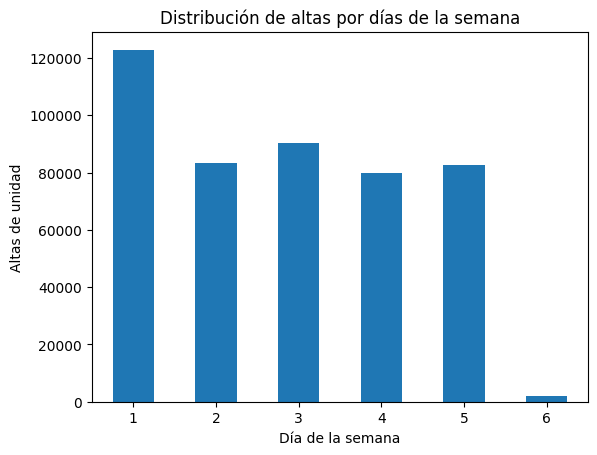

In [35]:
# Distribución de las altas de unidad en cada día de la semana
plot_dias = df3.plot.bar(title="Distribución de altas por días de la semana", xlabel="Día de la semana", ylabel="Altas de unidad", xlim=(1,7), legend=False, rot=0)

In [36]:
# Valores no nulos del nuevo dataset
df_priv.notnull().sum()

codPaq            460811
mes_alta          460811
diasem_alta       460811
turno             460811
num_envios        460811
alto              460811
ancho             460811
largo             460811
peso              460811
pv                460811
cp                460811
unidad            460811
tipo              460811
ur                460811
ud                460811
use               460811
ot                460811
osp               460811
distancia         460811
tiempo_entrega    460811
x_dest            460811
y_dest            460811
min_reparto       460811
dist_reparto      460811
dtype: int64